FYI: Random Forest ended up working better than KNeighborsClassifier.

In [1]:
import random
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Try decision tree, random forest

# To ignore warning at clf.score(X_test, y_test)
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
simplefilter(action='ignore', category=FutureWarning)

# Get Data

In [2]:
data = load_breast_cancer()

# Describe data

In [3]:
print("\nKeys:\n", data.keys())
print("\nFeatures:\n", data["feature_names"]) # X values
print("\nTargets:\n", data["target_names"])   # y values


Keys:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Targets:
 ['malignant' 'benign']


# Split data

In [4]:
X = data['data']
y = data['target']

# Bincount
counts = np.bincount(y)
counts

array([212, 357])

According to [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data):

Class distribution: 357 benign, 212 malignant

Diagnosis (M = malignant, B = benign) <span style="color:red;">&lt;&ndash; !</span>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

# Classify
## Using KNeighborsClassifier

In [7]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print("\nScore:\n", clf.score(X_test, y_test))


Score:
 0.9298245614035088


# Predict on real data

Let's say we have a spreadsheet of features.

`X_new = np.array([3.4, 1.2...])` <- 30 values

Feed them to the predict function.

Today we're just gonna fabricate them.  Just one row.

In [9]:
num_features = len(data["feature_names"])
num_features

30

In [10]:
# Create a random sample; give it a list, and how many.
# Throw it into a numpy array.
X_new = np.array(random.sample(range(0, 50), num_features))
X_new

array([39, 26, 31, 43, 23, 36,  2, 32, 14, 20, 11,  1, 17,  7, 25, 30, 48,
       24,  0, 40,  8, 18, 29, 42, 45, 22, 10, 15,  6, 13])

In [11]:
# Make a prediction
what_class = clf.predict([X_new])  # Expects a 2D array, hence the brackets.
what_class

array([1])

In [12]:
what_name = data["target_names"][what_class[0]]
what_name

'benign'

# Which is which

In [13]:
## That answers your question on which is which.

benign = 1
malignant = 0

# That's all you do!

In [14]:
label_1 = np.array([0])
label_2 = np.array([1])

name_1 = data['target_names'][label_1[0]]
name_2 = data['target_names'][label_2[0]]

print(f"{label_1[0]} is {name_1} and {label_2[0]} is {name_2}")

0 is malignant and 1 is benign


# Pandas DataFrame

https://youtu.be/ULvlqwjNNAo

In [15]:
# Concatenate...
column_data = np.concatenate([data["data"], data["target"][:, None]], axis=1)
column_names = np.concatenate([data["feature_names"], ["class"]])

In [16]:
column_data.shape

(569, 31)

In [17]:
# column_names is just the feature names, from above, plus "class"

In [18]:
len(column_names)

31

In [19]:
df = pd.DataFrame(column_data, columns=column_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


# Correlations

In [20]:
# Oh, look - it's a confusion matrix.
correlations = df.corr()
correlations

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


# Plot correlations

<AxesSubplot:>

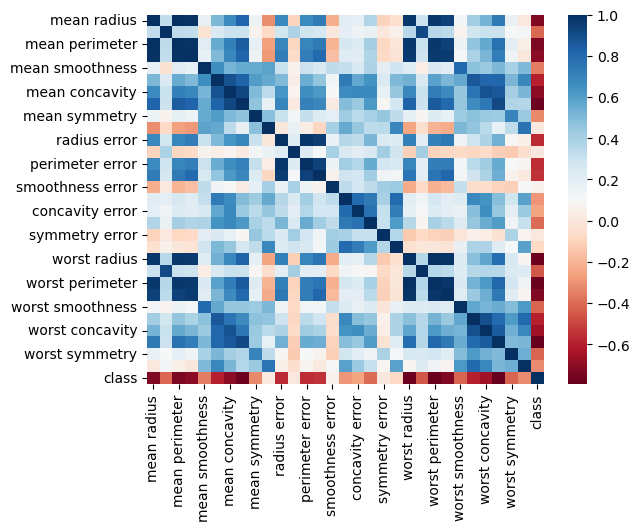

In [21]:
# sns.heatmap(correlations, cmap="coolwarm", annot=True, annot_kws={"fontsize": 8})
# plt.tight_layout()
# plt.show()

sns.heatmap(correlations, cmap="RdBu")

# Color Palette

In [22]:
# Make it fail and it tells you all the colors it should be.
try:
    sns.heatmap(correlations, cmap="dog")
except ValueError as ve:
    print(ve)

'dog' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()

# Fit on the train
clf1.fit(X_train, y_train)

# Score on the test
clf1.score(X_test, y_test)

0.8947368421052632

In [24]:
pred = clf1.predict([X_new])
data["target_names"][pred[0]]

'malignant'

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()

# Fit on the train
clf2.fit(X_train, y_train)

# Score on the test
clf2.score(X_test, y_test)

0.956140350877193

In [26]:
pred2 = clf2.predict([X_new])
data["target_names"][pred2[0]]

'malignant'

# Which classifier had the highest score?

In [27]:
classifiers = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
scores = [0.9035087719298246, 0.9035087719298246, 0.9298245614035088]

# Our friend, argmax.
mmax = np.argmax(scores)

classifiers[mmax]

'RandomForestClassifier'